# Random Forest

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [5]:
X, y = make_classification(n_features=6, n_redundant=0, n_informative=6, n_clusters_per_class=1)


In [6]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6'])
df['target'] = y
print(df.shape)
df.head()

(100, 7)


,col1,col2,col3,col4,col5,col6,target
0,-0.934183,1.001646,-0.066263,-0.597967,1.147379,-0.269350,0
1,1.839444,0.222952,0.983220,-0.470552,-1.951508,-1.712824,0
2,0.797138,-1.561668,3.174866,-1.598292,-1.659973,-1.547106,0
3,0.572759,-0.897332,2.938598,-1.342698,-0.691088,-2.704707,0
4,-1.698316,2.281094,0.949978,-0.525673,-0.985293,-0.371170,1


In [7]:
# function for row sampling 

def sample_row(df, percentage):
    return df.sample(int(percentage*df.shape[0]), replace= True)

In [56]:
# function for feature sampling 

def sample_feature(df, percentage):
    cols = random.sample(df.columns.tolist()[:-1], int(percentage*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [43]:
import random
list1 = [1, 2, 3, 4, 5, 6]
print(random.choice(list1))

5


In [9]:
# function for row sampling 

def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [15]:
df1 = sample_row(df,0.1)
df2 = sample_row(df,0.1)
df3 = sample_row(df,0.1)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()
model3 = DecisionTreeClassifier()

In [27]:
model1.fit(df1.iloc[:,0:6], df1.iloc[:,-1])

DecisionTreeClassifier()

In [28]:
model2.fit(df2.iloc[:,0:6], df2.iloc[:,-1])

DecisionTreeClassifier()

In [29]:
model3.fit(df3.iloc[:,0:6], df3.iloc[:,-1])

DecisionTreeClassifier()

In [30]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[3] <= 0.178\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

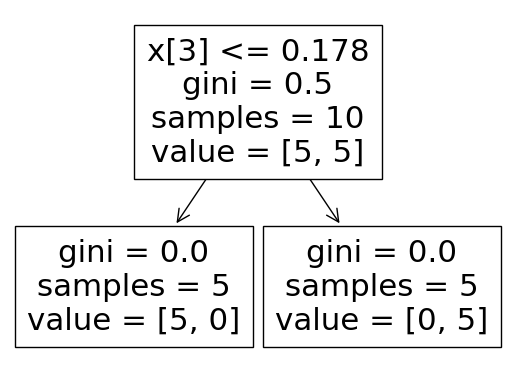

In [31]:
plot_tree(model1)

[Text(0.5, 0.75, 'x[3] <= -0.142\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

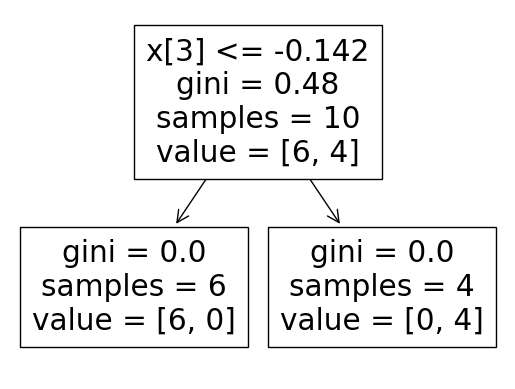

In [32]:
plot_tree(model2)

[Text(0.5, 0.75, 'x[3] <= -0.272\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

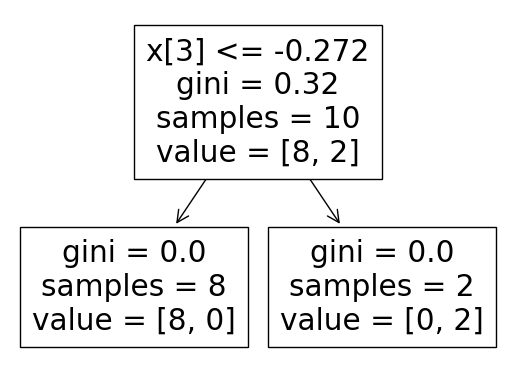

In [33]:
plot_tree(model3)

In [34]:
model1.predict(np.array([-0.934183, 1.001646,-0.066263, -0.597967, 1.147379, -0.269350]).reshape(1,6))

C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [57]:
df1 = sample_feature(df, 0.9)
df2 = sample_feature(df, 0.9)
df3 = sample_feature(df, 0.9)

C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_3864\664992967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_3864\664992967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_3864\664992967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [58]:
model1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])

DecisionTreeClassifier()

In [60]:
model2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])

DecisionTreeClassifier()

In [61]:
model3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[1] <= -0.352\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3, 0.75, 'x[0] <= 1.734\ngini = 0.229\nsamples = 53\nvalue = [46, 7]'),
 Text(0.2, 0.5833333333333334, 'x[4] <= -2.478\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= -0.119\ngini = 0.08\nsamples = 48\nvalue = [46, 2]'),
 Text(0.2, 0.25, 'x[4] <= 0.496\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(0.4, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.75, 'x[4] <= 0.639\ngini = 0.156\nsamples = 47\nvalue = [4, 43]'),
 Text(0.6, 0.5833333333333334, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.8, 0.5833333333333334, 'x[1]

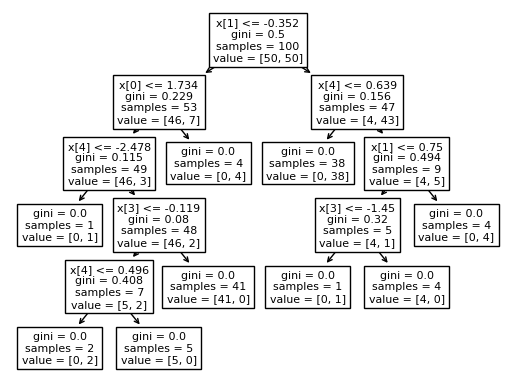

In [62]:
plot_tree(model1)

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= -0.352\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[4] <= 1.734\ngini = 0.229\nsamples = 53\nvalue = [46, 7]'),
 Text(0.25, 0.6428571428571429, 'x[0] <= -2.478\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= -0.432\ngini = 0.08\nsamples = 48\nvalue = [46, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[4] <= 0.365\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.25, 0.21428571428571427, 'x[4] <= 0.588\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5, 0.35714285714285715, '

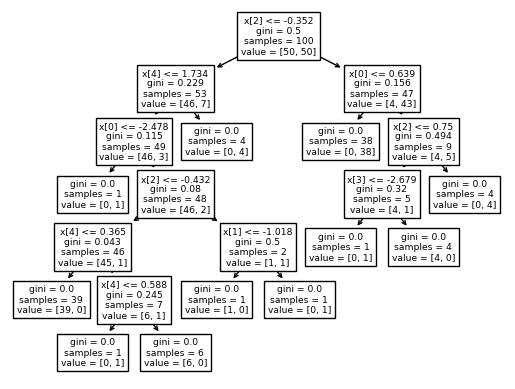

In [63]:
plot_tree(model2)

[Text(0.5333333333333333, 0.9166666666666666, 'x[0] <= 0.546\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3333333333333333, 0.75, 'x[3] <= -1.009\ngini = 0.332\nsamples = 57\nvalue = [12, 45]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[0] <= -1.694\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.4166666666666667, 'x[4] <= 0.357\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.26666666666666666, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5333333333333333, 0.5833333333333334, 'x[4] <= 0.843\ngini = 0.156\nsamples = 47\nvalue = [4, 43]'),
 Text(0.4666666666666667, 0.4166666666666667, 'x[3] <= 0.146\ngini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(0.4, 0.25, 'x[3] <= 0.014\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini

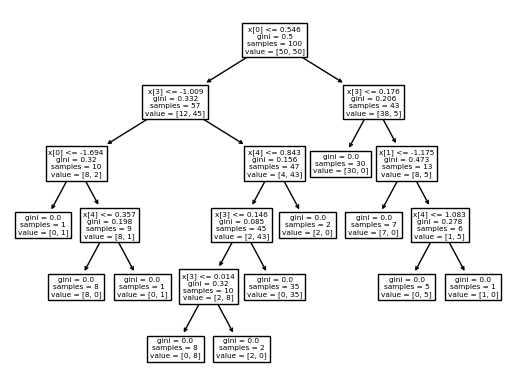

In [64]:
plot_tree(model3)

In [65]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [66]:
df = pd.read_csv('heart.csv')

In [67]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
X= df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)


In [87]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [88]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8360655737704918

In [89]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test, y_pred)

0.8032786885245902

In [90]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7213114754098361

In [91]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.819672131147541

In [92]:
rf = RandomForestClassifier(max_samples=0.88,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7868852459016393

In [93]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))


0.8313978494623656

## GridSearchCV

In [94]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [95]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }


In [96]:
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [97]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [98]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 20}

In [99]:
rf_grid.best_score_

0.8595238095238095

## RandomSearchCV

In [100]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [101]:

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }

In [102]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [103]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    r

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [104]:
rf_grid.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 0.5,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [105]:
rf_grid.best_score_

0.8429421768707483

## OOB Evaluation

In [119]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [108]:
model = RandomForestClassifier(oob_score=True)

In [109]:
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [115]:
y_ped = model.predict(X_test)

In [113]:
accuracy_score(y_test, y_pred)

0.7868852459016393

In [114]:
model.oob_score_

0.8181818181818182

## Feature Importance 


In [116]:
model.feature_importances_

array([0.10043428, 0.02684057, 0.15298906, 0.08411093, 0.07990852,
       0.01002183, 0.02334496, 0.10209709, 0.05544887, 0.12529939,
       0.03821631, 0.11338173, 0.08790646])

In [117]:
model.feature_importances_.shape

(13,)

<Axes: >

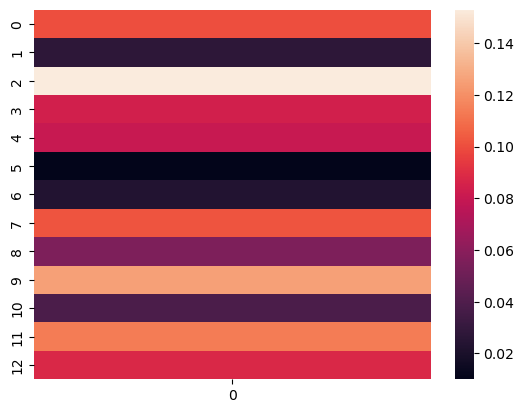

In [122]:
sns.heatmap(model.feature_importances_.reshape(13,1))